In [4]:
# before everything, import libraries
from IPython.lib.display import YouTubeVideo

# III. Algorithms > 01. Divide-and-Conquer and Recursion


**[<< Previous lesson]   |   [Next lesson >>](./02_Sorting.ipynb)**

<hr>
&nbsp;

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lessons" data-toc-modified-id="Lessons-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lessons</a></span></li><li><span><a href="#Master-theorem" data-toc-modified-id="Master-theorem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Master theorem</a></span></li><li><span><a href="#Recursion-pattern" data-toc-modified-id="Recursion-pattern-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Recursion pattern</a></span></li><li><span><a href="#Advanced-concept-(optional)" data-toc-modified-id="Advanced-concept-(optional)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Advanced concept (optional)</a></span><ul class="toc-item"><li><span><a href="#Tail-Recursion-(Tail-Call)" data-toc-modified-id="Tail-Recursion-(Tail-Call)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Tail Recursion (Tail Call)</a></span></li></ul></li></ul></div>

<hr>
&nbsp;

## Lessons

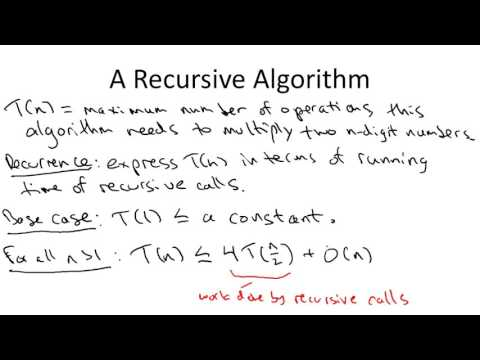

In [2]:
YouTubeVideo('6dGDcszz2DM',width=560,height=315)

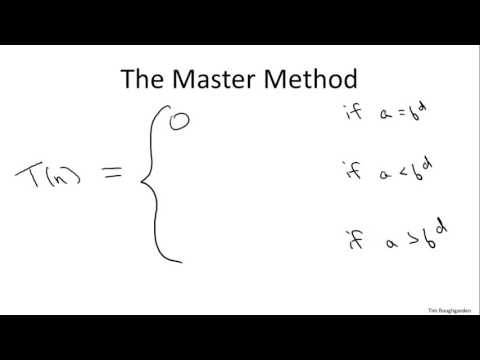

In [3]:
YouTubeVideo('rXiojCN9nIs',width=560,height=315)

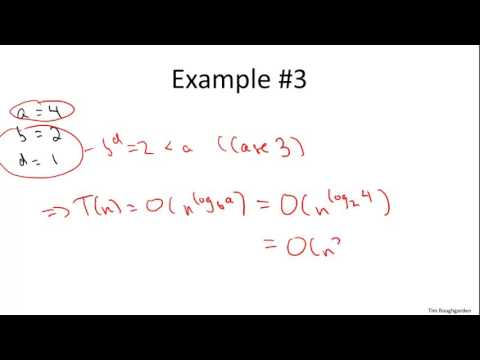

In [4]:
YouTubeVideo('4l1MvY7iGhs',width=560,height=315)

<hr>
&nbsp;

## Master theorem

&nbsp;

$$T(n) ≤ aT(\frac{n}{b}) + O(n^d)$$

$$\text{with  }
\begin{cases}
a ≥ 1 & \text{number of recursive calls} \\
b > 1 & \text{input size shrinkage factor}  \\
d ≥ 0 & \text{summing time of "combine step"}
\end{cases}$$


then

$a < b^d \Rightarrow  T(n) = O(n^d)$

$a = b^d \Rightarrow  T(n) = O(n^d log(n))$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; constant doesn't matter here ($a = b^d  ⇒ log_{a}(n) = c.log_{b}(n)$)

$a > b^d \Rightarrow  T(n) = O(n^d log_{b}(a^d))$ &nbsp; &nbsp; &nbsp; &nbsp; constant matters in the exponent

<hr>
&nbsp;

## Recursion pattern


- **Step 1:** Identify a recurrence relation between subproblems
    - Recurrence Relation
    - Base cases
- **Step 2:** Convert the recurrence relation to recursion
- **Step 3:** Optimization 1 - Top Down [Dynamic Programming](./05_Dynamic-Programming.ipynb) (Add memoization)
- **Step 4:** Optimization 2 - Bottom Up  [Dynamic Programming](./05_Dynamic-Programming.ipynb) (convert into iteration)
- **Step 5:** Optimization 3 - Fine Tuning - Reduce space

<hr>
&nbsp;

## Advanced concept (optional)

### Tail Recursion (Tail Call)

When recursing, the stack of calls gets deeper and deeper, reaches the solution, then returns through all of the stack frames.

`factorial(6)`<br>  
`= 6 * factorial(5)`<br>  
`= 6 * 5 * factorial(4)`<br>  
`= 6 * 5 * 4 * factorial(3)`<br>  
`= 6 * 5 * 4 * 3 * factorial(2)`<br>  
`= 6 * 5 * 4 * 3 * 2 * factorial(1)`<br>  
`= 6 * 5 * 4 * 3 * 2 * 1 * factorial(0)`<br>  
`= 6 * 5 * 4 * 3 * 2 * 1 * 1`<br>  
`= 6 * 5 * 4 * 3 * 2 * 1`<br>  
`= 6 * 5 * 4 * 3 * 2`<br>  
`= 6 * 5 * 4 * 6`<br>  
`= 6 * 5 * 24`<br>  
`= 6 * 120`<br>  
`= 720`<br>  

This means that we need a call stack whose size is linear in the depth of the recursive calls.

**Tail recursion** is a special case of recursion where the calling function does no more computation after making a recursive call. Since the current recursive instance is done executing at that point, we don't need a call stack at all for all of the recursive calls, and can implement the final call as a simple jump, which saves us space.

However, not all programming languages support tail recursion optimization.

Let's explore a few examples:
- Factorial: $f(n) = n \times f(n-1)$  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; with $f(0) = 1$
- Fibonnacci: $f(n) = f(n-1) + f(n-2)$ &nbsp; &nbsp; with $f(0)=0$ and $f(1)=1$

In [5]:
# Factorial (1 recursive call)

def factorial(n):  # f(n) = n * f(n-1)  and f(0) = 1
    def go(n, acc1):
        if n == 0:
            return acc1
        return go(n-1, n*acc1)

    return go(n, 1)

In [6]:
# Check
result = []
for i in range(11):
    result += factorial(i),
    
print(result)

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800]


In [ ]:
# classic example: Fibonnacci (2 recursives calls)

def fibonnacci(n):  # f(n) = f(n-1) + f(n-2)  with f(0) = 0 and f(1) = 1  
    def go(n, acc1, acc2):
        if n == 0:
            return acc1
        if n == 1:
            return acc2
        return go(n-1, acc2, acc1+acc2)

    return go(n, 0, 1)

In [ ]:
#check
result = []
for i in range(11):
    result += fibonnacci(i),
print(result)

&nbsp;  

**Generalization**

$\text{1 recursive call}
\begin{cases}
f(n) = g(f(n-1)) \\
f(0) = C
\end{cases}$

In [9]:
# Generalization
def func(n):
    def go(n, acc1):
        if n == 0:
            return acc1
        return go(n-1, g(acc1))

    return go(n, C)

Let's apply it to an example

In [19]:
# Pick some random coefficiants in [-10, 10]
from random import randint
A, B, C = [randint(-10,10) for _ in range(3)]
print("A, B, C =", A, B, C)

A, B, C = 8 -4 -1


In [11]:
# here we define g(x) as in the formula above
def g(x):
    from math import sin
    return A*sin(x) + B
#     return A*x + B          # alternative
#     return A*x**2 - B*x     # alternative

In [15]:
# here is the recursion as we know it
def normal_recur(n):
    if n == 0:
        return C
    return g(normal_recur(n-1))

In [16]:
# here is the equivalent implemented with tail recursion
def tail_recur(n):
    def go(n, acc1):
        if n == 0:
            return acc1
        return go(n-1, g(acc1))

    return go(n, C)

In [18]:
# check
for i in range(11):
    if tail_recur(i) != normal_recur(i):
        print('different results')
        break

else:
    print ("same results")

same results


&nbsp; 

$\text{2 recursive calls}
\begin{cases}
f(n) = g( f(n-1), f(n-2) ) \\
f(0) = D \\
f(1) = E
\end{cases}$

In [ ]:
# Generalization
def func(n):
    def go(n, acc1, acc2):
        if n == 0:
            return acc1
        if n == 1:
            return acc2
        return go(n-1, acc2, g(acc2, acc1))  # reversed order for acc1 and acc2

    return go(n, D, E)

Let's apply it to an example

In [21]:
# Pick some random coefficiants in [-10, 10]
A, B, C, D, E = [randint(-10,10) for _ in range(5)]
print("A, B, C, D, E =", A, B, C, D, E)

A, B, C, D, E = -6 7 10 7 5


In [22]:
# here we define g(x) as in the formula above

def g(x, y):
    return min(A*sin(x), B*sin(y)) + C
#     return A*x + B*y + C              # alternative
#     return A*x**2 - B*x               # alternative

In [26]:
# here is the recursion as we know it
def normal_recur(n):
    if n == 0:
        return D
    if n == 1:
        return E
    return g(normal_recur(n-1), normal_recur(n-2))

In [27]:
# here is the equivalent implemented with tail recursion
def tail_recur(n):
    def go(n, acc1, acc2):
        if n == 0:
            return acc1
        if n == 1:
            return acc2
        return go(n-1, acc2, g(acc2, acc1))

    return go(n, D, E)

In [28]:
# check
for i in range(11):
    if tail_recur(i) != normal_recur(i):
        print('different results')
        break

else:
    print ("same results")

same results


&nbsp;  

**Continuation Passing Style**

Sometimes we can’t make a function tail-recursive by just adding an accumulator to its arguments and CPS is the easiest way to achieve getting the function tail-recursive.

In CPS, instead of having a function return a value, it will take as an argument another function (the continuation) to which the result is given as an argument.

Simple tail recursion applied to leetcode problems:
- 70(LINK)

Leetcode problems that might need CPS
- 746(LINK)